<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
</center>
<center>Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center> Capstone проект №1. Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = '/Users/zaharsaraev/Documents/Machine_learning_coursera/Final_project/'

In [3]:
def csr(X):
    docs = X
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in docs:
        for term in d:
            if term == 0:
                continue
            index = vocabulary.setdefault(term, len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))

    return(csr_matrix((data, indices, indptr), dtype=int))


In [8]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    file_names = glob(path_to_csv_files+'/*')
    os.chdir(path_to_csv_files)
    freq_dict = pickle.load(open(site_freq_path,"rb"))
    C = np.array([]) #Создаем пустой массив 
    y = [] #Создаем массив с ID пользователей
    for name in file_names: #Пробегаемся по всем файлам
        data = pd.read_csv(name)
        sites = np.hstack(np.array(data.site)) #Считываем все сайты в одну строку
        X = []
        for i in range(0, len(sites), window_size): #Переформируем 1D массив в матрицу соответствующую размерам в длины сессии/окна
            if len(sites[i:i+session_length]) == session_length: 
                X.append(sites[i:i+session_length])
            else: #Если сессия обрезается, дополняем нулями
                X.append(list(np.hstack((sites[i:i+session_length], 
                                         np.zeros(session_length-len(sites[i:i+session_length]))))))
            
            userID = name
            userID = userID.replace(path_to_csv_files+'/user', '')
            userID = userID.replace('.csv', '')
            y.append(int(userID)) #Сохраняем ID
        
        if len(C) ==0: #Соединяем матрицы для каждого файла в одну (если начальная  пустая матрица, то просто присваиваем)
            C = X
        else:
            C = np.concatenate((C, X), axis=0)
        
    X_sparce = csr(C) #Делаем разреженную матрицу
    return(X_sparce, y)

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [9]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

In [10]:
X_toy_s5_w3.toarray()

array([[1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0]])

In [11]:
y_s5_w3

[2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1]

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [12]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'{}users'.format(num_users)), 
                                                os.path.join(PATH_TO_DATA,'site_freq_{}users.pkl'.format(num_users)),
                                       session_length=session_length, window_size=window_size)
            data_lengths.append(X_sparse.shape[0])
            args = [num_users, session_length, window_size]
            with open(os.path.join(PATH_TO_DATA, 
                       'X_sparse_{0}users_s{1}_w{2}.pkl'.format(*args)), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 
                       'y_{0}users_s{1}_w{2}.pkl').format(*args), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)
            #print('Next')

CPU times: user 3min 47s, sys: 2min 30s, total: 6min 17s
Wall time: 6min 41s


**Запишите в файл *answer2_1.txt* все числа из списка *data_lengths* через пробел. Полученный файл будет ответом на 1 вопрос теста.**

In [22]:
def write_answer_to_file(answer, file_address):
    answer = str(answer)
    answer = answer.replace('[', '')
    answer = answer.replace(']', '')
    answer = answer.replace(', ', ' ')
    with open(file_address, 'w') as out_f:
        out_f.write(answer)

In [13]:
data_lengths

[14061,
 20087,
 20087,
 20087,
 28118,
 28118,
 28118,
 28118,
 137019,
 195712,
 195712,
 195712,
 273957,
 273957,
 273957,
 273957]

In [24]:
write_answer_to_file(data_lengths, 
                     os.path.join(PATH_TO_DATA,'answer2_1.txt'))

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [26]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [27]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,userID
session_id,,,,,,,,,,,
0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,5.0,5.0,6.0,39
1,7.0,8.0,7.0,4.0,9.0,10.0,11.0,12.0,9.0,13.0,39
2,14.0,15.0,15.0,9.0,15.0,9.0,9.0,4.0,4.0,9.0,39
3,12.0,15.0,15.0,16.0,17.0,13.0,18.0,19.0,20.0,21.0,39
4,22.0,23.0,19.0,21.0,24.0,19.0,25.0,26.0,21.0,19.0,39


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   site1   14061 non-null  float64
 1   site2   14061 non-null  float64
 2   site3   14061 non-null  float64
 3   site4   14061 non-null  float64
 4   site5   14061 non-null  float64
 5   site6   14061 non-null  float64
 6   site7   14061 non-null  float64
 7   site8   14061 non-null  float64
 8   site9   14061 non-null  float64
 9   site10  14061 non-null  float64
 10  userID  14061 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [29]:
train_df['userID'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: userID, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [30]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [31]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

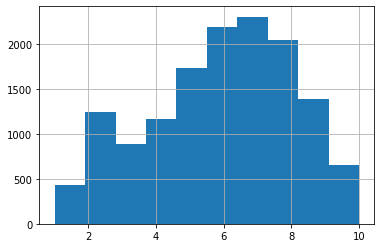

In [32]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. Сделайте вывод. Ответом на второй вопрос в тесте будет файл со словом "YES" или "NO" в зависимости от того, распределено ли нормально число уникальных сайтов в сессии.**

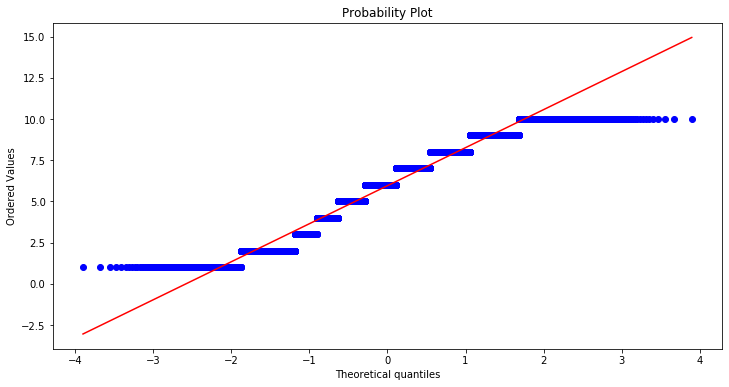

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
res1 = stats.probplot(num_unique_sites, dist="norm", plot=ax)

In [34]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(num_unique_sites))                    

Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


In [35]:
write_answer_to_file('NO', 
                     'answer2_2.txt')

**Вывод:** QQ-plot и критерий Шапиро-Уилка отвергает гипотезу о нормальности распределения (хвосты тяжелые)

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

In [41]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')
print(len(has_two_similar) - sum(has_two_similar))

651


In [79]:
pi_val = stats.binom_test(sum(has_two_similar), len(has_two_similar), p = 0.95, alternative = 'greater')

0.02207653769072678

In [81]:
write_answer_to_file(pi_val, 
          os.path.join(PATH_TO_DATA,'answer2_3.txt'))

**Постройте для этой доли 95% доверительный интервал Уилсона. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_4.txt*. Это будет ответом на 4 вопрос теста.**

In [43]:
wilson_interval = proportion_confint(np.sum(has_two_similar), len(has_two_similar), 
                                                                  method = 'wilson')
wilson_interval

(0.9501028841411286, 0.9570527377232229)

In [44]:
write_answer_to_file('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)), 
                     'answer2_4.txt')

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [132]:
site_freqs = pickle.load(open(os.path.join(PATH_TO_DATA,'site_freq_10users.pkl'),"rb"))
high_site_freqs = {}
arr_freqs = []
for k, v in site_freqs.items():
    if v[1] >=1000:
        high_site_freqs[k] = v
        arr_freqs.append(v[1])
high_site_freqs

{'clients1.google.com': [7, 1493],
 'www.google.fr': [13, 7813],
 'apis.google.com': [16, 3758],
 'www.google.com': [17, 5441],
 's-static.ak.facebook.com': [25, 1388],
 'static.ak.facebook.com': [26, 1265],
 'www.facebook.com': [28, 4141],
 'safebrowsing-cache.google.com': [31, 1039],
 'www.youtube.com': [40, 1804],
 'i1.ytimg.com': [44, 1232],
 'mail.google.com': [52, 4158],
 'accounts.youtube.com': [55, 1057],
 'accounts.google.com': [57, 2089],
 'clients6.google.com': [60, 1039],
 'platform.twitter.com': [110, 1041],
 'twitter.com': [111, 1204],
 'plus.google.com': [538, 2630],
 'download.jboss.org': [569, 1441],
 'translate.google.fr': [1154, 1002],
 'r3---sn-gxo5uxg-jqbe.googlevideo.com': [1163, 3244],
 's.youtube.com': [1165, 8300],
 'r4---sn-gxo5uxg-jqbe.googlevideo.com': [1168, 1702],
 'r2---sn-gxo5uxg-jqbe.googlevideo.com': [1468, 1939],
 'fr-mg42.mail.yahoo.com': [2029, 1868],
 'r1---sn-gxo5uxg-jqbe.googlevideo.com': [2088, 3094]}

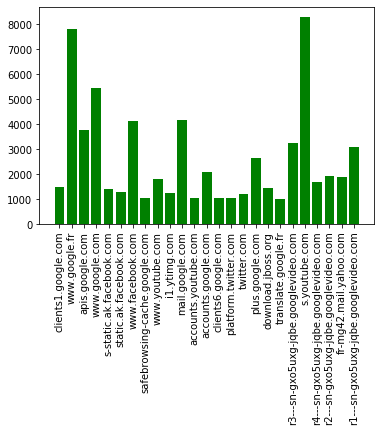

In [133]:
plt.bar(high_site_freqs.keys(), arr_freqs, color='g')
plt.xticks(rotation='vertical')
plt.show()

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

In [193]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [194]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [195]:
freq_bs = list(map(np.mean, get_bootstrap_samples(np.array(list(site_freqs.values()))[:,1], len(site_freqs))))

print('Conf. interval for frequency of sites appereance [%f,%f]' % (round(stat_intervals(freq_bs, 0.05)[0],3), 
      round(stat_intervals(freq_bs, 0.05)[1],3)))

Conf. interval for frequency of sites appereance [22.571000,35.813000]


In [196]:
write_answer_to_file('22.571 35.813', 
                            os.path.join(PATH_TO_DATA, 'answer2_5.txt'))

## Пути улучшения
В этом проекте свобода творчества на каждом шаге, а 7 неделя проекта посвящена общему описанию (`html`, `ipynb` или `pdf`) и взаимному оцениванию проектов. Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/identify-me-if-you-can4) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.